In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#this function generates an ER graph with N nodes, E edges
#returns: edge list
def get_ER(N, E):
    #this dict will contain the edges: edges[node_ID] = set(neighbor node ids)
    edges = {}
    # adding E edges
    for e in range(E):
        #init the two edge which will be connected. ID=0 not an edge, because I start numbering from 1
        n1 = 0
        n2 = 0
        # generate two random number between 1 and N
        # we have to repeat the generation until we get two different node and the selected nodes aren't connected
        while n1==n2 or (n1 in edges and n2 in edges[n1]) or (n2 in edges and n1 in edges[n2]):
            n1 = np.random.randint(1, N)
            n2 = np.random.randint(1, N)
        # if the selected nodes aren't in edges list we create them and initialize as an empty set
        if n1 not in edges:
            edges[n1] = set()
        if n2 not in edges:
            edges[n2] = set()
        # making the connection
        edges[n1].add(n2)
        edges[n2].add(n1)
    #returning the edges
    return edges

In [4]:
# calculate the degrees for a graph from a given edge list
def get_degrees(edges):
    # this dict will contain the degree for every node
    degrees = {}
    # going through nodes
    for node in edges:
        #the degree of a node is simply the number of connectins
        degrees[node] = len(edges[node])
    #returning the degrees
    return degrees

In [5]:
#generating ER graph
ER = get_ER(10**6, 10**6)

In [6]:
# getting the degree of nodes for ER graph
degree=get_degrees(ER)

## The CCDF of the network's node degrees for $N=E=10^6$

In [7]:
# sorting the degrees array, heapsort nlog(n) algorithm
node_deg = np.sort(np.array(list(degree.values())), kind="heapsort")

In [8]:
def cch(x, arr):
    # finding the x value in the prices array
    # searchsorted use Binary search, log(n) algorihm
    idx = np.searchsorted(arr, int(np.ceil(x)))
    #if the array is sorted then cch is simply len-(idx+1)
    return len(arr)-idx-1

In [26]:
#initializating the x values, getting cch
x = [i for i in range(node_deg[-1]+1)]
h = [cch(i, node_deg) for i in x]
# NORMALIZING to get CCDF
h=np.array(h)/max(h)

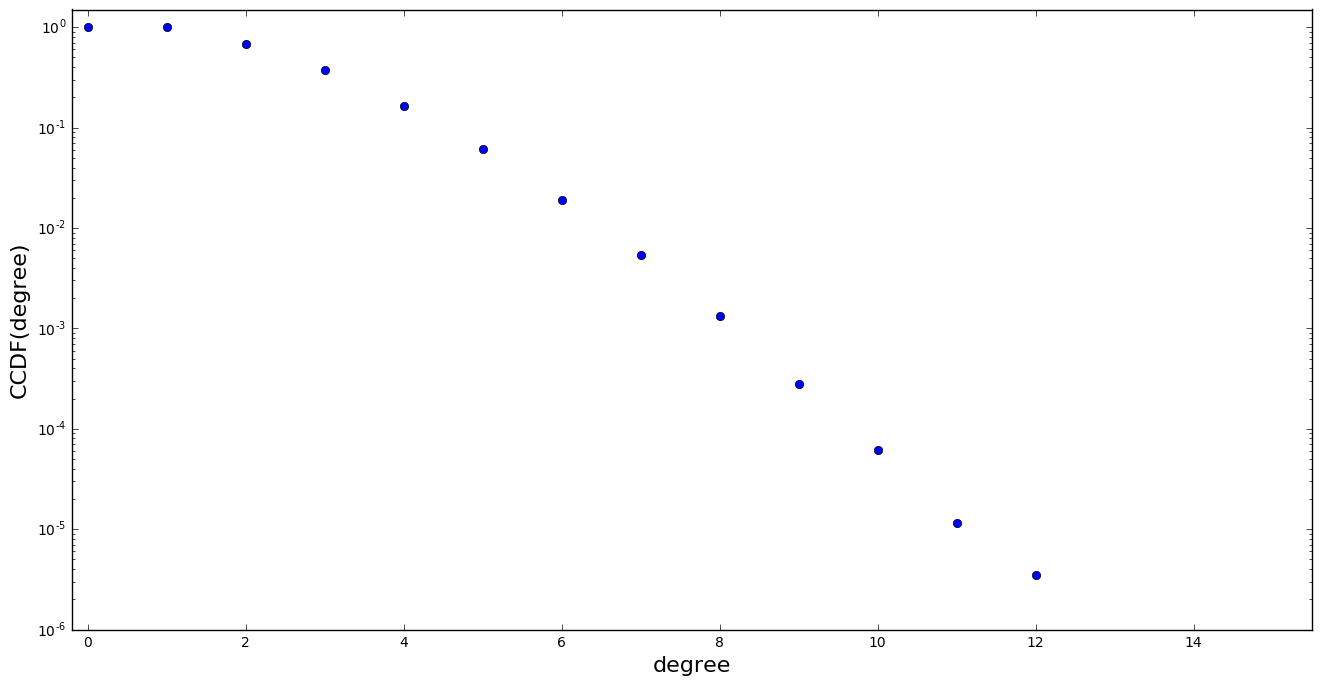

In [31]:
#plot
plt.figure(0, (16,8))
plt.ylim([1e-6,1.5e0])
plt.xlim([-0.2, 15.5])
plt.yscale("log")
plt.xlabel("degree", fontsize=16)
plt.ylabel("CCDF(degree)", fontsize=16)
plt.plot(x, h, 'o')

### Extra: degree distribution

First I want to check the degree distribution

In [12]:
# with bincount function I'm counting how many times a degree appear in the degree dict
degree_dist = np.bincount(list(degree.values()))

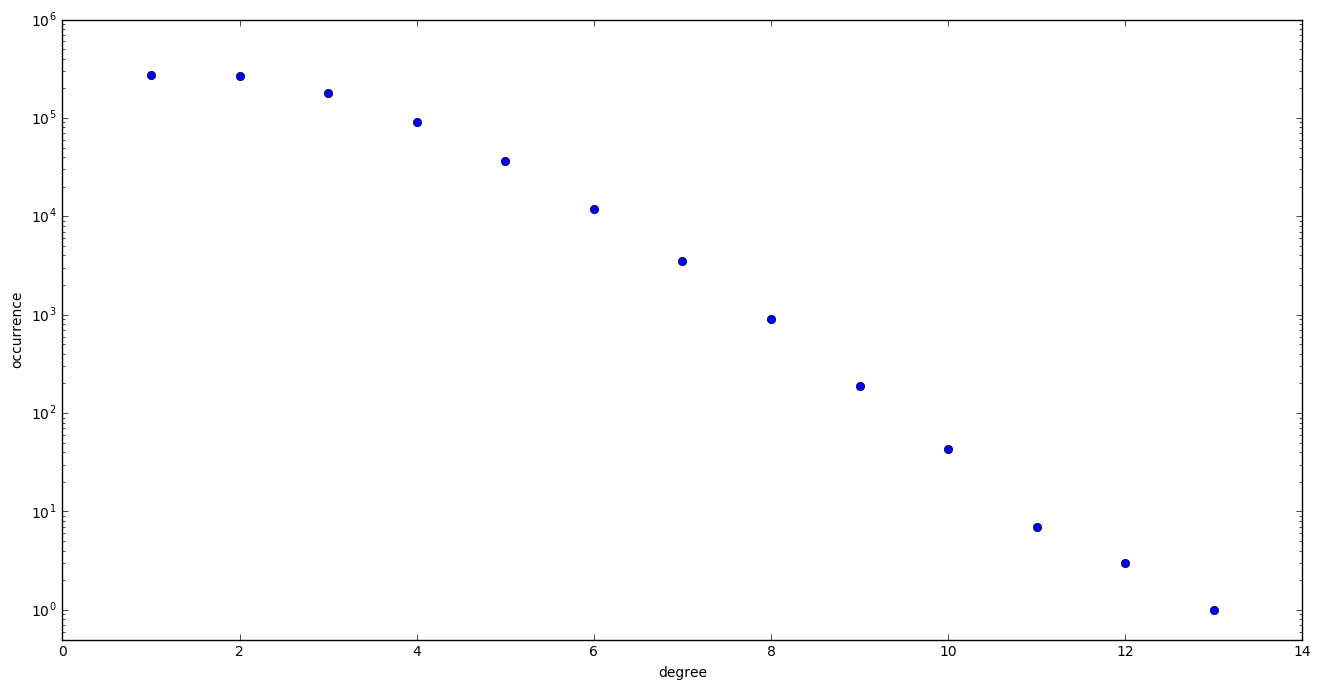

In [13]:
plt.figure(0, (16,8))
plt.xlabel("degree")
plt.ylabel("occurrence")
plt.ylim([1e0-0.5, 1e6])
plt.yscale("log")
plt.plot(np.arange(len(degree_dist)),degree_dist, 'o')